In [1]:
#importing modules
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [2]:
Categories=['Cars','Ice cream cone','Cricket ball']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='data/' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

loading... category : Cars
loaded category:Cars successfully
loading... category : Ice cream cone
loaded category:Ice cream cone successfully
loading... category : Cricket ball
loaded category:Cricket ball successfully


In [3]:
#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target

In [4]:
#input data 
x=df.iloc[:,:-1] 
#output data
y=df.iloc[:,-1] 

In [5]:
# Defining the parameters grid for GridSearchCV 
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}

# Creating a support vector classifier 
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid 
model=GridSearchCV(svc,param_grid)

In [6]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

In [7]:
# Training the model using the training data 
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

The Model is trained well with the given images


In [8]:
# Testing the model using the testing data 
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
#accuracy
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 0 2 2 0 2 1 2 0 1 2 2 0 1 2 0 0 2 1 1]
The actual data is:
[0 0 2 2 0 1 1 2 0 1 2 2 0 1 2 0 0 0 1 1]
The model is 90.0% accurate


In [9]:
#classification report
print(classification_report(y_test, y_pred, target_names=['Cars', 'Ice cream cone', 'Cricket ball']))

                precision    recall  f1-score   support

          Cars       1.00      0.88      0.93         8
Ice cream cone       1.00      0.83      0.91         6
  Cricket ball       0.75      1.00      0.86         6

      accuracy                           0.90        20
     macro avg       0.92      0.90      0.90        20
  weighted avg       0.93      0.90      0.90        20



Enter URL of Image : download.jpeg


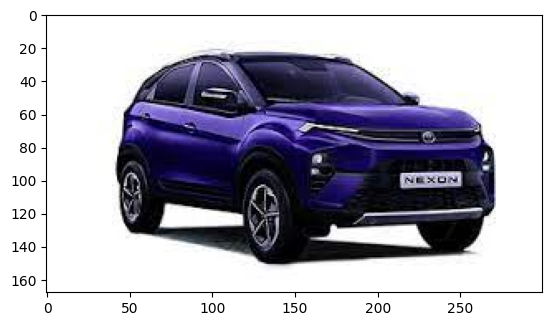

Cars = 77.536331109236%
Ice cream cone = 1.6731004841432215%
Cricket ball = 20.790568406620793%
The predicted image is : Cars


In [10]:
#prediction
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])